In [8]:
#import
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

In [9]:
#load data
df = pd.read_csv('marathon_results_2016.csv')

In [10]:
#change time string to minites
def time_to_min(string):
    if string is not '-':
        time_segments = string.split(':')
        hours = int(time_segments[0])
        mins = int(time_segments[1])
        sec = int(time_segments[2])
        time = hours*60 + mins + np.true_divide(sec,60)
        return time
    else:
        return -1

Text(0.5,1,'Split Distribution (Negative split when < 1)')

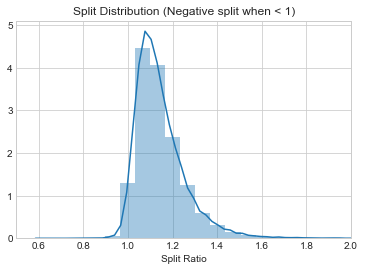

In [11]:
df['Half_min'] = df['Half'].apply(lambda x: time_to_min(x))
df['Full_min'] = df['Official Time'].apply(lambda x: time_to_min(x))
df['split_ratio'] = (df['Full_min'] - df['Half_min'])/(df['Half_min'])
df_split = df[df.Half_min > 0]
sns.distplot(df_split.split_ratio)
plt.xlim([0.5,2])
plt.xlabel('Split Ratio')
plt.title('Split Distribution (Negative split when < 1)')

(0.6, 1.8)

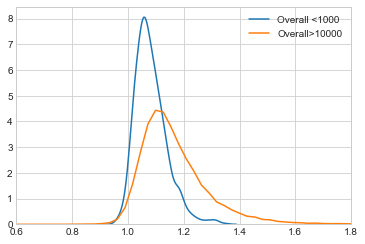

In [12]:
sns.kdeplot(df_split.split_ratio[df_split.Overall < 1000])
sns.kdeplot(df_split.split_ratio[df_split.Overall > 10000])
plt.legend(['Overall <1000','Overall>10000'])
plt.xlim([0.6,1.8])

(0.6, 1.8)

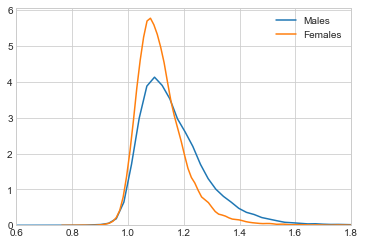

In [13]:
sns.kdeplot(df_split.split_ratio[df_split['M/F'] == 'M'])
sns.kdeplot(df_split.split_ratio[df_split['M/F'] == 'F'])
plt.legend(['Males','Females'])
plt.xlim([0.6,1.8])

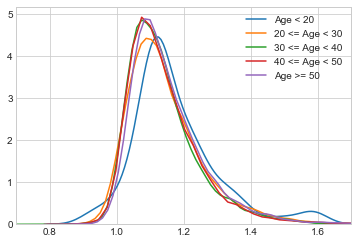

In [14]:
sns.kdeplot(df_split.split_ratio[df_split.Age < 20])
sns.kdeplot(df_split.split_ratio[(df_split.Age>=20)&(df_split.Age<30)])
sns.kdeplot(df_split.split_ratio[(df_split.Age>=30)&(df_split.Age<40)])
sns.kdeplot(df_split.split_ratio[(df_split.Age>=40)&(df_split.Age<50)])
sns.kdeplot(df_split.split_ratio[df_split.Age >= 50])
plt.xlim([0.7,1.7])
plt.legend(['Age < 20', '20 <= Age < 30','30 <= Age < 40','40 <= Age < 50','Age >= 50'])